IMPORT LIBRARIES

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score



LOAD DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/xai/Tor Non Tor- Multi class/TimeBasedFeatures-10s-Layer2.csv')
print(data.head())

   Source IP   Source Port  Destination IP   Destination Port   Protocol  \
0  10.0.2.15         57188  82.161.239.177                110          6   
1  10.0.2.15         57188  82.161.239.177                110          6   
2  10.0.2.15         57188  82.161.239.177                110          6   
3  10.0.2.15         57188  82.161.239.177                110          6   
4  10.0.2.15         57188  82.161.239.177                110          6   

    Flow Duration   Flow Bytes/s   Flow Packets/s   Flow IAT Mean  \
0         7248168   2.112603e+04        29.110804    34515.085714   
1         5157723   1.052790e+03         3.683796   286540.166667   
2              41   1.324390e+07     48780.487805       41.000000   
3         9543565   6.373855e+04        83.930900    11929.456250   
4         9987537   1.996166e+05       245.806348     4069.900978   

    Flow IAT Std  ...   Bwd IAT Min  Active Mean   Active Std   Active Max  \
0  273869.262513  ...             7            0  

DATA PREPARATION AND PREPROCESSING

In [435]:
data.shape

(8044, 29)

In [4]:
data['label'].value_counts()

VOIP             2291
BROWSING         1604
P2P              1085
VIDEO             874
FILE-TRANSFER     864
AUDIO             721
CHAT              323
MAIL              282
Name: label, dtype: int64

In [5]:
#dropping source IP and destination IP columns
data = data.drop(['Source IP'],axis=1)

In [6]:
data = data.drop([' Destination IP'],axis=1)


In [7]:
data['label'].unique()

array(['AUDIO', 'BROWSING', 'CHAT', 'FILE-TRANSFER', 'MAIL', 'P2P',
       'VIDEO', 'VOIP'], dtype=object)

In [8]:
#label encoding categorical variable
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
data.label

0       0
1       0
2       0
3       0
4       0
       ..
8039    2
8040    2
8041    2
8042    2
8043    2
Name: label, Length: 8044, dtype: int64

In [9]:
#split the dataset into independent and dependent variables
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [10]:
X.head()


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,57188,110,6,7248168,2.112603e+04,29.110804,34515.085714,273869.262513,3897923,5,...,3898131,7,0,0,0,0,0,0,0,0
1,57188,110,6,5157723,1.052790e+03,3.683796,286540.166667,878838.525555,3743359,135,...,3743573,451,0,0,0,0,0,0,0,0
2,57188,110,6,41,1.324390e+07,48780.487805,41.000000,0.000000,41,41,...,0,0,0,0,0,0,0,0,0,0
3,57188,110,6,9543565,6.373855e+04,83.930900,11929.456250,90072.192523,2007954,5,...,2008877,5,0,0,0,0,0,0,0,0
4,57188,110,6,9987537,1.996166e+05,245.806348,4069.900978,20365.733229,608241,5,...,608241,5,0,0,0,0,0,0,0,0


In [11]:
#splitting the dataset
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.25,random_state=10)

In [12]:
X_train.shape

(6033, 26)

In [444]:
# Replace infinity values with NaN in training and testing sets
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Replace NaN values with the mean of their respective columns in training set
for col in X_train.columns[X_train.isnull().any(axis=0)]:
    mean_value = X_train[col].mean()
    X_train[col].fillna(mean_value, inplace=True)
    # Ensure the same mean is used for the test set
    X_test[col].fillna(mean_value, inplace=True)

# **MODEL USED: DECISION TREE**

MODEL TRAINING  

In [13]:
classifier = DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=1,random_state=10)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

MODEL TESTING

In [14]:
y_pred = classifier.predict(X_test)
y_pred

array([3, 7, 6, ..., 7, 3, 5])

MODEL EVALUATION

In [15]:
#MAKING THE CONFUSION MATRIX

clf_rpt = classification_report(y_test,y_pred)
print("classification report: \n", clf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       189
           1       0.99      0.97      0.98       419
           2       0.96      0.96      0.96        83
           3       1.00      0.99      0.99       210
           4       0.95      0.96      0.96        85
           5       0.95      0.98      0.96       240
           6       0.96      0.96      0.96       221
           7       0.98      0.99      0.99       564

    accuracy                           0.98      2011
   macro avg       0.97      0.97      0.97      2011
weighted avg       0.98      0.98      0.98      2011

Accuracy Score : 0.9751367478866235


In [16]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9751645562684508

<Axes: >

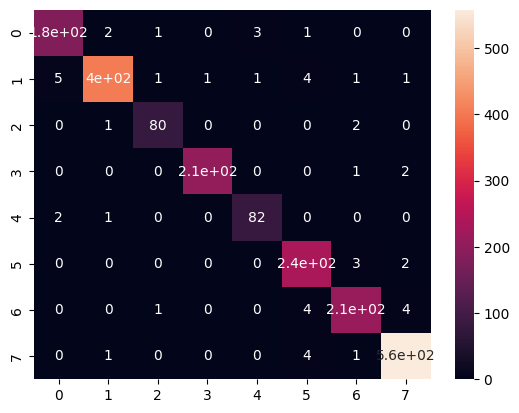

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

DISPLAYING TREE

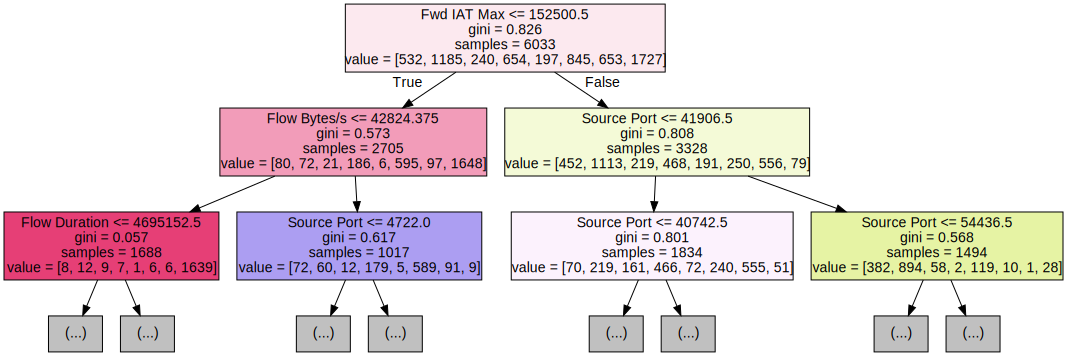

In [18]:
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(classifier,out_file=None ,feature_names=X.columns,filled=True,max_depth=2)
graphviz.Source(tree_graph)


# **MODEL USED: RANDOM FOREST**

MODEL TRAINING

In [19]:
model_rf = RandomForestClassifier(n_estimators=400,criterion='gini',min_samples_split=2,random_state=10)

model_rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=400, random_state=10)

MODEL TESTING

In [20]:
rf_prediction = model_rf.predict(X_test)
rf_prediction

array([3, 7, 6, ..., 7, 3, 5])

In [21]:
# compute prediction probabilities for sample 'x'
predict_rf = lambda x: model_rf.predict_proba(x).astype(float)

MODEL EVALUATION

In [22]:
rf_rpt = classification_report(y_test,rf_prediction)
print("classification report: \n", rf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,rf_prediction))

classification report: 
               precision    recall  f1-score   support

           0       0.91      0.86      0.89       189
           1       0.88      0.95      0.92       419
           2       0.88      0.88      0.88        83
           3       0.98      0.97      0.97       210
           4       0.96      0.80      0.87        85
           5       0.97      0.97      0.97       240
           6       0.93      0.94      0.93       221
           7       0.99      0.97      0.98       564

    accuracy                           0.94      2011
   macro avg       0.94      0.92      0.93      2011
weighted avg       0.94      0.94      0.94      2011

Accuracy Score : 0.9428145201392342


In [23]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,rf_prediction, average='weighted')
f1_weighted

0.9427412050857723

<Axes: >

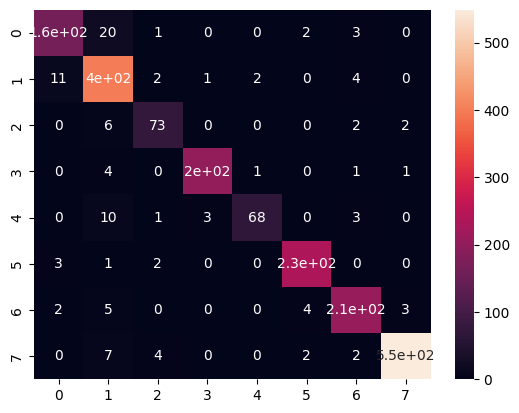

In [24]:
rf_cm = confusion_matrix(y_test, rf_prediction)
sns.heatmap(rf_cm, annot = True)

# MODEL USED: XGBOOST

MODEL TRAINING

In [26]:
from xgboost import XGBClassifier

In [27]:
xgb = XGBClassifier(max_depth=6,min_child_weight=1,reg_lambda =1,random_state=10)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

MODEL TESTING

In [28]:
y_pred=xgb.predict(X_test)
y_pred

array([3, 7, 6, ..., 7, 3, 5])

In [29]:
predict_xgb = lambda x: xgb.predict_proba(x).astype(float)

MODEL EVALUATION

In [30]:
#MAKING THE CONFUSION MATRIX

clf_rpt = classification_report(y_test,y_pred)
print("classification report: \n", clf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       189
           1       0.99      0.98      0.99       419
           2       0.99      1.00      0.99        83
           3       0.97      1.00      0.98       210
           4       0.98      1.00      0.99        85
           5       1.00      0.99      0.99       240
           6       1.00      1.00      1.00       221
           7       0.99      0.99      0.99       564

    accuracy                           0.99      2011
   macro avg       0.99      0.99      0.99      2011
weighted avg       0.99      0.99      0.99      2011

Accuracy Score : 0.991546494281452


In [31]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.9915528647814441

<Axes: >

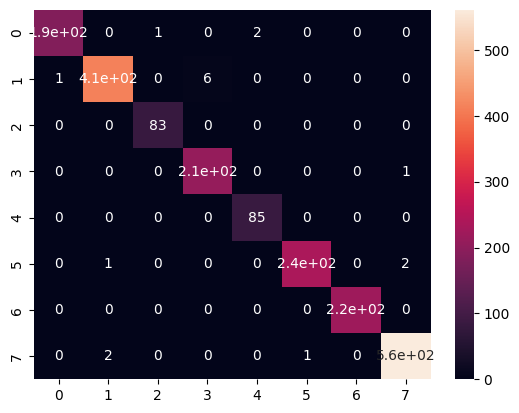

In [32]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# **MODEL USED: SVM**

Model Evaluation

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform(X_test)



In [62]:
from sklearn.svm import SVC

MODEL TRAINING

In [63]:
svc=SVC(probability=True,gamma=2)
svc.fit(X_train_n, y_train)

SVC(gamma=2, probability=True)

MODEL TESTING

In [64]:
y_pred = svc.predict(X_test_n)
y_pred

array([3, 7, 6, ..., 7, 3, 5])

In [65]:
# compute prediction probabilities for sample 'x'
predict_svc = lambda x: svc.predict_proba(X_test_n)

In [66]:
type(predict_svc)

function

MODEL EVALUATION

In [67]:
#MAKING THE CONFUSION MATRIX

clf_rpt = classification_report(y_test,y_pred)
print("classification report: \n", clf_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.80      0.64      0.71       189
           1       0.66      0.88      0.75       419
           2       0.81      0.47      0.60        83
           3       0.92      0.93      0.93       210
           4       0.87      0.39      0.54        85
           5       1.00      0.97      0.98       240
           6       0.78      0.77      0.78       221
           7       0.99      0.96      0.98       564

    accuracy                           0.85      2011
   macro avg       0.85      0.75      0.78      2011
weighted avg       0.86      0.85      0.84      2011

Accuracy Score : 0.8473396320238687


In [68]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.8443500296157931

<Axes: >

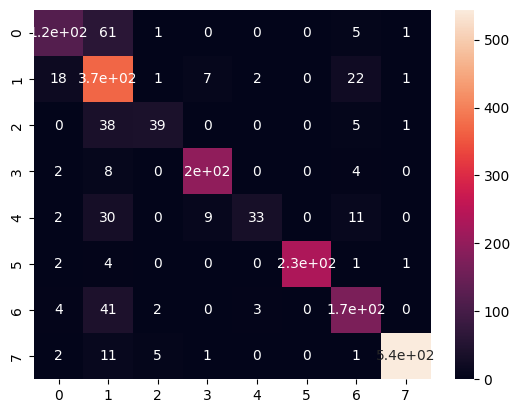

In [69]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# **MODEL USED: Multi-Layer Perceptron**

Model Training

In [70]:
from sklearn.neural_network import MLPClassifier

In [71]:
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=10)

In [72]:
mlp.fit(X_train_n, y_train)

MLPClassifier(hidden_layer_sizes=(150, 100, 50), max_iter=300, random_state=10)

Model Prediction

In [73]:
#Predicting y for X_val
y_pred = mlp.predict(X_test_n)

In [74]:
#MAKING THE CONFUSION MATRIX

mlp_rpt = classification_report(y_test,y_pred)
print("classification report: \n", mlp_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       189
           1       0.86      0.86      0.86       419
           2       0.82      0.78      0.80        83
           3       0.99      0.98      0.98       210
           4       0.86      0.86      0.86        85
           5       0.98      0.97      0.98       240
           6       0.93      0.90      0.91       221
           7       0.98      0.99      0.98       564

    accuracy                           0.92      2011
   macro avg       0.90      0.90      0.90      2011
weighted avg       0.92      0.92      0.92      2011

Accuracy Score : 0.921929388363998


In [75]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.922022174566212

<Axes: >

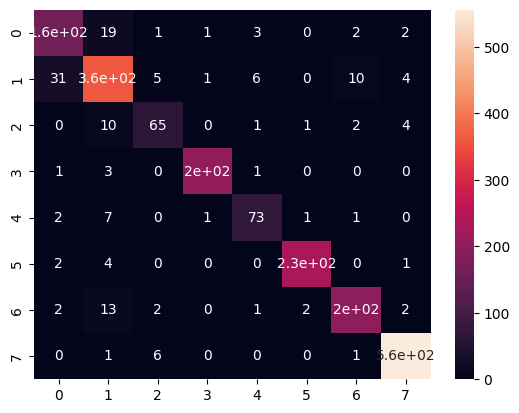

In [76]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

# **MODEL USED : LIGHT GRADIENT BOOST (LGB)**

In [77]:
from lightgbm import LGBMClassifier

In [78]:
lgb = LGBMClassifier(num_iterations=100,tree_learner='serial',random_state=10)
lgb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/lightgbm/engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002753 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4708
[LightGBM] [Info] Number of data points in the train set: 6033, number of used features: 23
[LightGBM] [Info] Start training from score -2.428356
[LightGBM] [Info] Start training from score -1.627502
[LightGBM] [Info] Start training from score -3.224361
[LightGBM] [Info] Start training from score -2.221892
[LightGBM] [Info] Start training from score -3.421796
[LightGBM] [Info] Start training from score -1.965663
[LightGBM] [Info] Start training from score -2.223423
[LightGBM] [Info] Start training from score -1.250859
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

LGBMClassifier(num_iterations=100, random_state=10, tree_learner='serial')

In [79]:
y_pred=lgb.predict(X_test)
y_pred

array([3, 7, 6, ..., 7, 3, 5])

In [80]:
predict_lgb = lambda x: lgb.predict_proba(x).astype(float)

In [81]:
#MAKING THE CONFUSION MATRIX

lgb_rpt = classification_report(y_test,y_pred)
print("classification report: \n", lgb_rpt)
print("Accuracy Score :" ,accuracy_score(y_test,y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       189
           1       0.99      0.99      0.99       419
           2       1.00      1.00      1.00        83
           3       0.99      1.00      0.99       210
           4       0.98      1.00      0.99        85
           5       1.00      1.00      1.00       240
           6       1.00      1.00      1.00       221
           7       1.00      0.99      1.00       564

    accuracy                           0.99      2011
   macro avg       0.99      1.00      0.99      2011
weighted avg       0.99      0.99      0.99      2011

Accuracy Score : 0.9945300845350572


In [82]:
# Replace 'y_true' and 'y_pred' with your actual and predicted labels
f1_weighted = f1_score(y_test,y_pred, average='weighted')
f1_weighted

0.994534037768549

<Axes: >

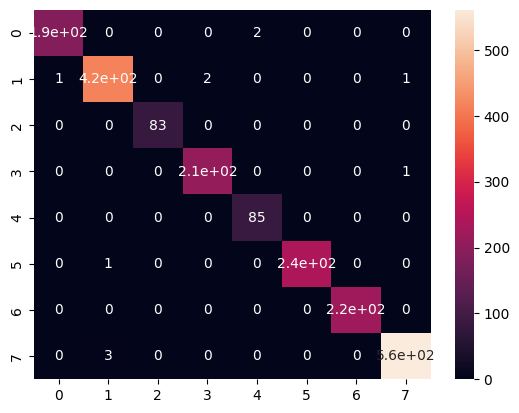

In [83]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

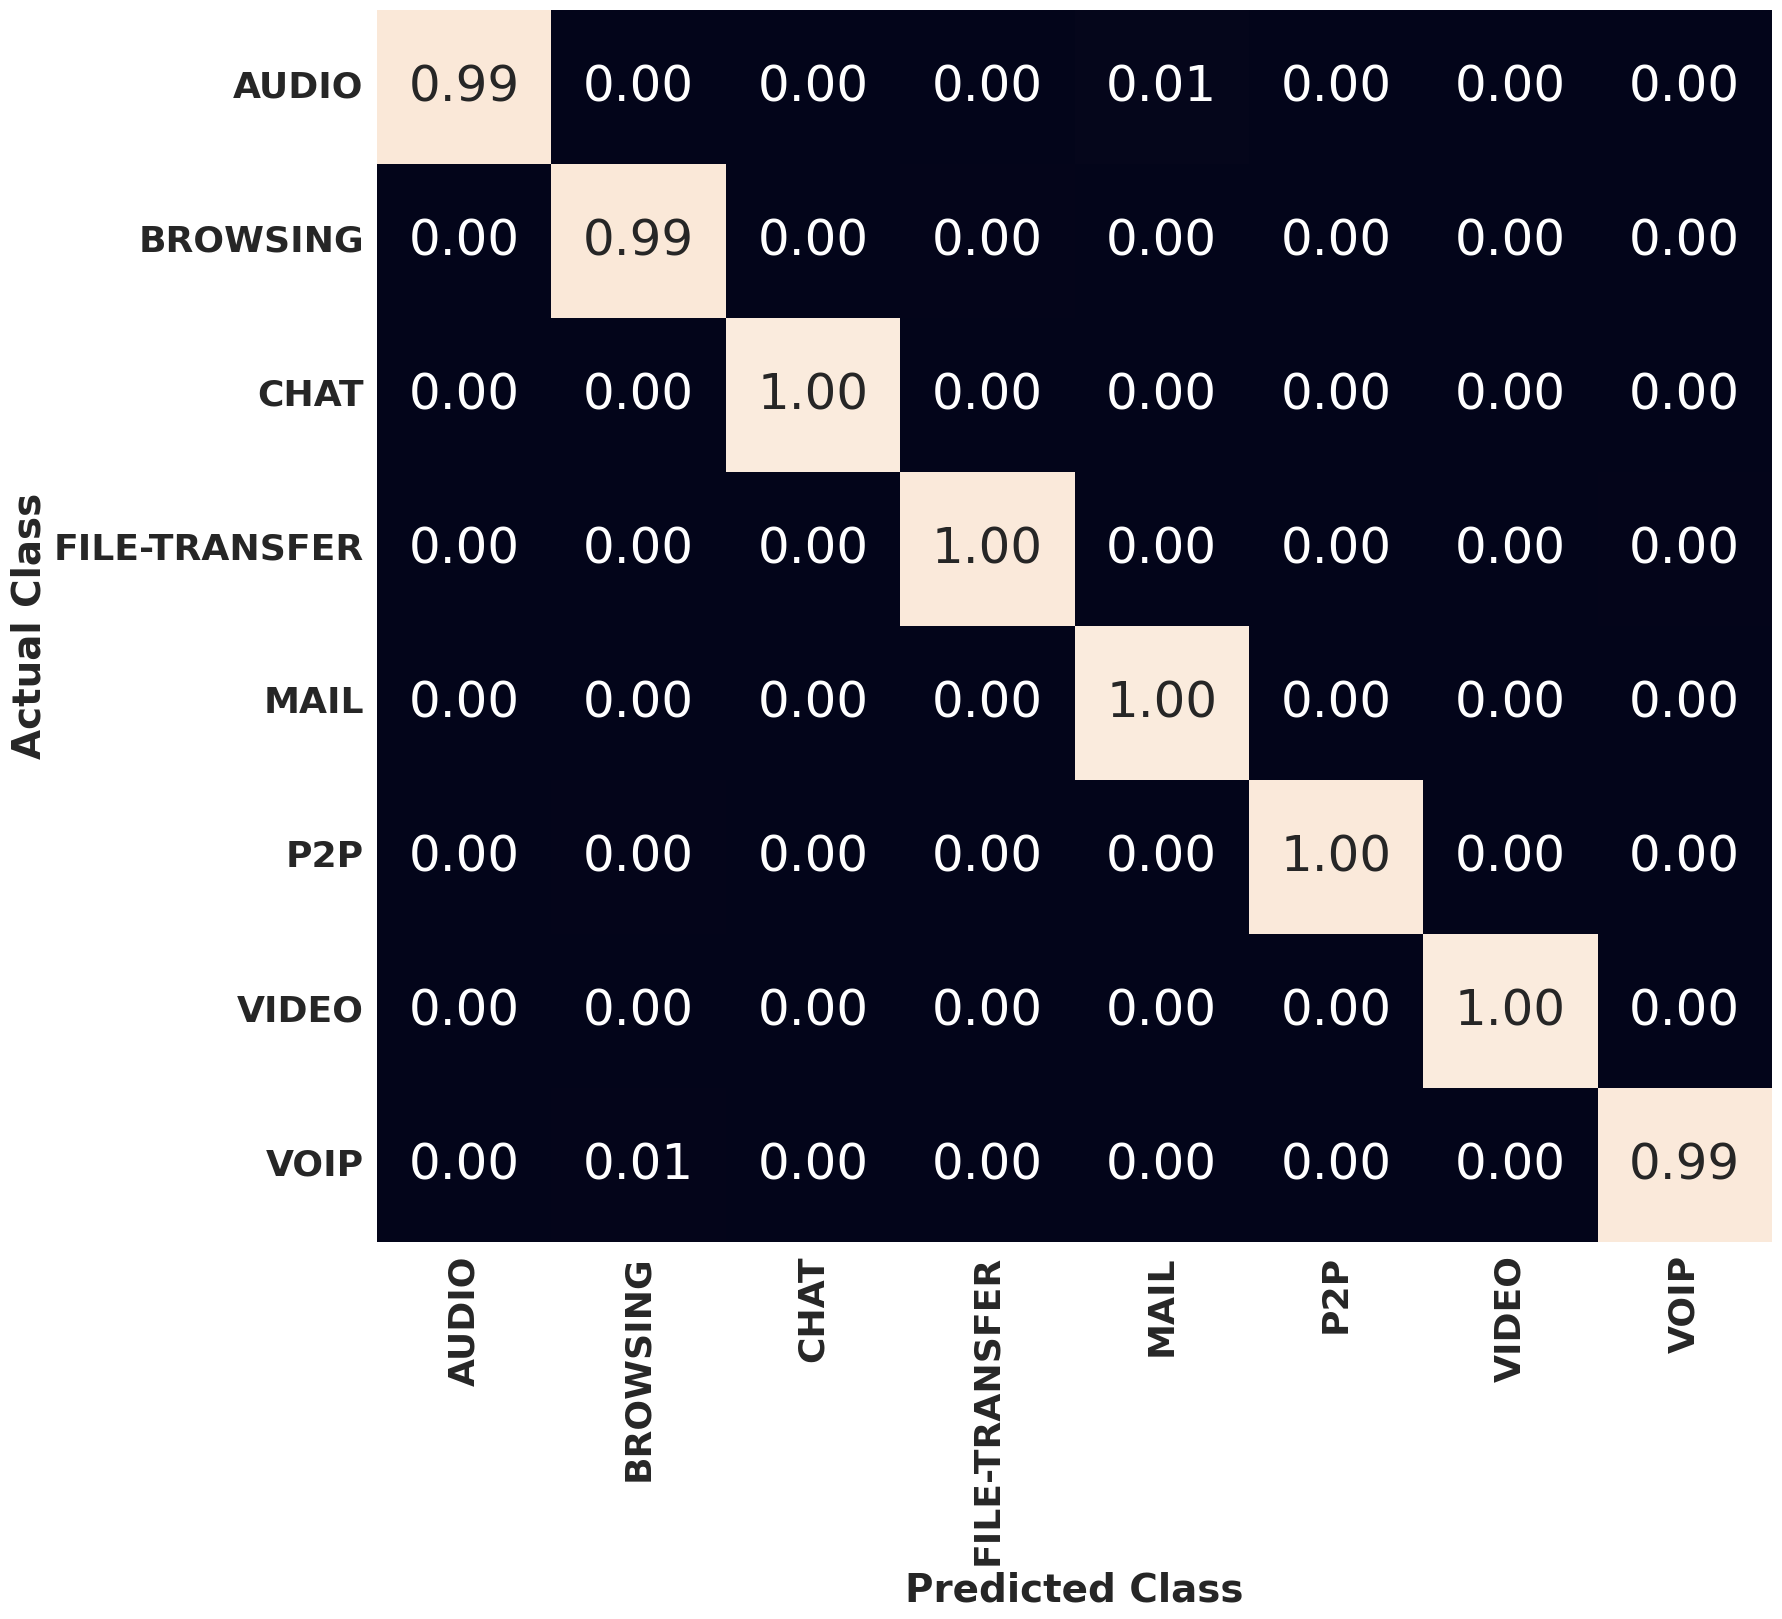

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels, respectively
# Replace class_labels with the actual class labels in your problem
class_labels = ['AUDIO', 'BROWSING', 'CHAT', 'FILE-TRANSFER', 'MAIL', 'P2P',
       'VIDEO', 'VOIP']
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to represent probabilities
cm_normalized = cm / cm.sum(axis=1)[:, np.newaxis]

# Create a DataFrame from the normalized confusion matrix
cm_df = pd.DataFrame(cm_normalized, index=class_labels, columns=class_labels)
# Increase font size
sns.set(font_scale=3)
# Plot the confusion matrix using seaborn's heatmap
plt.figure(figsize=(18, 16))
heatmap = sns.heatmap(cm_df, annot=True, fmt='.2f', cbar=False)

# Customize x-axis and y-axis tick labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=26, fontweight='bold')
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=26, fontweight='bold')

# Customize labels and title
plt.xlabel('Predicted Class',fontsize=28, fontweight='bold')
plt.ylabel('Actual Class',fontsize=28, fontweight='bold')

# Save the plot as an EPS file
plt.savefig('/content/drive/MyDrive/xai/Tor Non Tor- Multi class/tor_confusion_matrix.eps', format='eps')

# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/xai/Tor Non Tor- Multi class/tor_confusion_matrix.png', format='png')

# Show the plot
plt.show()


In [89]:
# Make predictions and measure prediction time per sample
import time
start_time = time.time()
y_pred = lgb.predict(X_test)
end_time = time.time()

# Calculate the prediction time per sample
total_samples = len(X_test)
prediction_time_per_sample = (end_time - start_time) / total_samples

print(f"Total prediction time: {end_time - start_time} seconds")
print(f"Prediction time per sample: {prediction_time_per_sample} seconds")

Total prediction time: 0.1312413215637207 seconds
Prediction time per sample: 6.526172131462989e-05 seconds


MODEL INTERPRETATION USING PERMUTATION IMPORTANCE

In [90]:
!pip install eli5

In [91]:
import eli5 as eli
from eli5.sklearn import PermutationImportance

In [92]:
# Imporatant features from Test data
perm = PermutationImportance(lgb,random_state=10).fit(X_test,y_test)

In [93]:
eli.show_weights(perm,feature_names=X_test.columns.tolist())

Weight,Feature
0.4378 ± 0.0120,Source Port
0.2341 ± 0.0115,Destination Port
0.0120 ± 0.0028,Flow Bytes/s
0.0021 ± 0.0012,Flow Duration
0.0007 ± 0.0005,Fwd IAT Max
0.0003 ± 0.0008,Flow IAT Max
0.0003 ± 0.0005,Flow IAT Mean
0.0001 ± 0.0004,Fwd IAT Mean
0 ± 0.0000,Idle Min
0 ± 0.0000,Active Min


In [94]:
fig = eli.show_weights(perm,feature_names=X_test.columns.tolist())
plt.savefig('PI_Tor_Multi.eps', bbox_inches='tight',dpi=500)

<Figure size 640x480 with 0 Axes>

In [95]:
fig = eli.show_weights(perm,feature_names=X_test.columns.tolist())
plt.savefig('PI_Tor_Multi.png', bbox_inches='tight',dpi=500)

<Figure size 640x480 with 0 Axes>

MODEL INTERPRETATION USING SHAP

In [96]:
pip install shap==0.43.0

In [97]:
import shap
# JavaScript visualization initialization
shap.initjs()
#define a tree explainer for the model built
lgb_explainer_1 = shap.TreeExplainer(lgb)
shap_values = lgb_explainer_1.shap_values(X_test)

[-8.037152222910612, -5.700433248691473, -9.354932840442045, -7.924718317224211, -9.6048446058992, -6.9030492074650125, -7.687673178286392, -4.295619453639159]
3


<Figure size 2000x400 with 0 Axes>

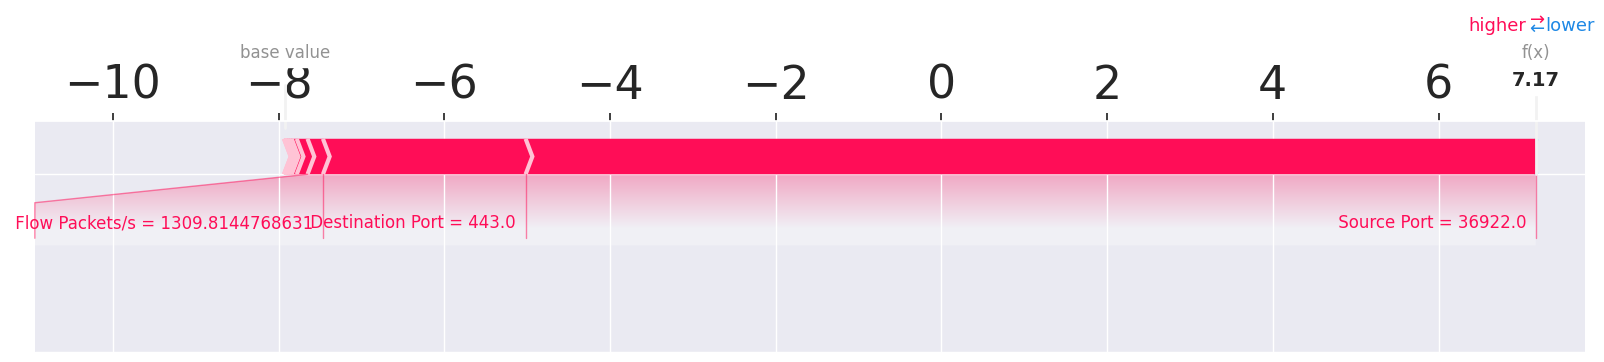

In [100]:
import shap
import matplotlib.pyplot as plt

# JavaScript visualization initialization
shap.initjs()

# Assuming lgb_explainer_1 and shap_values have been previously defined
i = 6
print(lgb_explainer_1.expected_value)
instance = X_test.iloc[[i]]

# Print predicted values
p = lgb.predict(instance)
print(p[0])

# Create SHAP force plot with specified figsize
fig = plt.figure(figsize=(20, 4), facecolor='white')  # Change facecolor to 'white'

shap.force_plot(
    lgb_explainer_1.expected_value[p[0]],
    shap_values[p[0]][i],
    X_test.iloc[[i]],
    matplotlib=True,
    feature_names=X.columns
)

plt.show()

SUMMARY PLOT

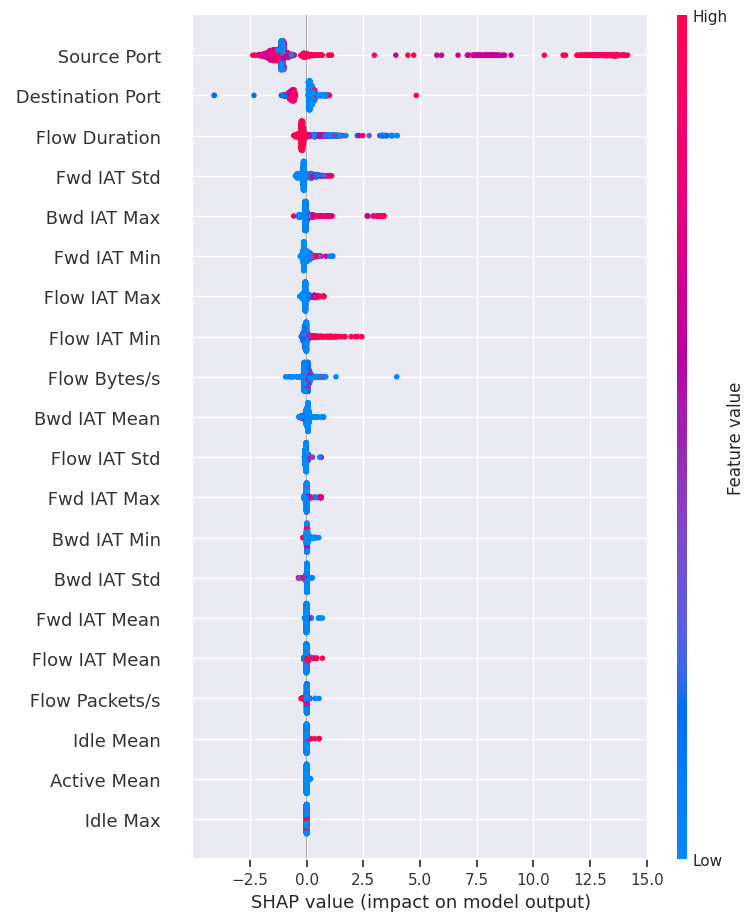

In [101]:
import shap
shap.initjs()
#define a tree explainer for the model built
lgb_explainer_1 = shap.TreeExplainer(lgb)
shap_values = lgb_explainer_1.shap_values(X_test)
shap.summary_plot(shap_values[0],X_test,feature_names=X.columns)

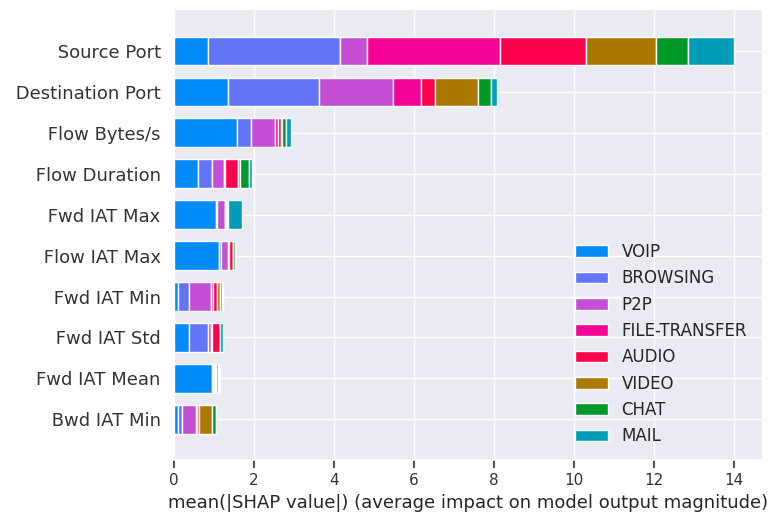

In [102]:
shap.summary_plot(shap_values,X_test,class_names=['AUDIO', 'BROWSING', 'CHAT', 'FILE-TRANSFER', 'MAIL', 'P2P','VIDEO','VOIP'],max_display=10,show=False)

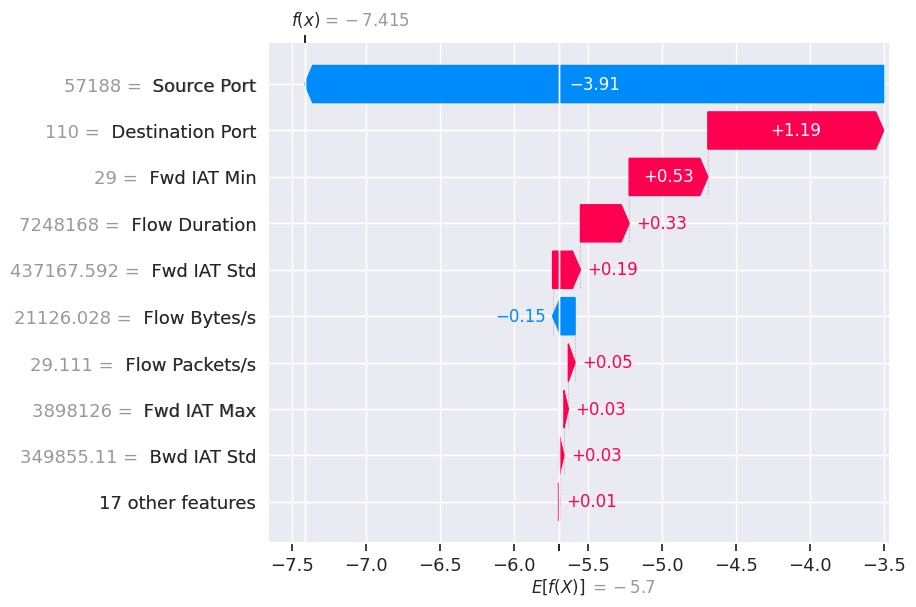

In [103]:
from shap import TreeExplainer, Explanation
explainer = TreeExplainer(lgb)
e = explainer(X)
exp = Explanation(e.values[:,:,1],
                  e.base_values[:,1],
                  data=X.values,
                  feature_names=X.columns)
idx = 0
shap.waterfall_plot(exp[idx])

MODEL INTERPRETATION USING LIME

In [104]:
!pip install lime

In [105]:
import lime
from lime import lime_tabular

In [106]:
X1 = X_train.values

In [107]:
X_test.head(10)

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Max,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
3223,36629,443,6,9958573,58110.032431,99.211001,1.008974e+04,1.708200e+04,57187,11,...,58054,20,0,0,0,0,0,0,0,0
4514,38894,443,6,9988772,23615.115051,71.480258,1.400950e+04,1.700979e+04,63202,16,...,80504,16,0,0,0,0,0,0,0,0
6675,443,41994,6,9995870,69070.826251,96.039664,1.042322e+04,4.369146e+04,710333,0,...,710562,27,0,0,0,0,0,0,0,0
5331,443,37652,6,9985920,88505.415625,115.462571,8.668333e+03,1.608977e+04,61053,3,...,61225,19,0,0,0,0,0,0,0,0
6007,443,54130,6,9993877,291542.911725,353.316336,2.831127e+03,9.020197e+03,102266,1,...,102487,31,0,0,0,0,0,0,0,0
66,37652,443,6,5678540,286.869512,1.056610,1.135708e+06,2.359650e+06,5349103,159,...,5349490,328708,183,0,183,183,5349103,0,5349103,5349103
2677,36922,443,6,9976222,988091.283454,1309.814477,7.635253e+02,5.239402e+03,191151,0,...,191151,0,0,0,0,0,0,0,0,0
3201,36629,443,6,8837071,614.456985,2.150034,4.909484e+05,1.325355e+06,5610420,38,...,5610458,214,1940533,0,1940533,1940533,5610420,0,5610420,5610420
3807,41071,443,6,9994843,565031.186583,671.446265,1.489544e+03,6.739723e+03,143064,0,...,143064,0,0,0,0,0,0,0,0,0
3559,59960,443,6,9824840,339684.005032,395.019156,2.532175e+03,1.290907e+04,577084,0,...,577084,0,0,0,0,0,0,0,0,0


In [108]:
y_test.iloc[[6]]

2677    3
Name: label, dtype: int64

In [109]:
chosen_instance = X_test.iloc[6]

In [110]:
lgb_explainer_2 = lime.lime_tabular.LimeTabularExplainer(X1,feature_names=X_train.columns,class_names =['Audio','Browsing','Chat','File-Transfer','Mail','P2P','Video','VOIP'])


In [111]:
exp = lgb_explainer_2.explain_instance(chosen_instance,predict_lgb,top_labels=1,num_features=10)

In [ ]:
exp.show_in_notebook(show_all=False)

COUNTERFACTUAL EXPLANATION

In [117]:
!pip install dice_ml

In [118]:
import seaborn as sns
import pandas as pd

In [119]:
data = pd.read_csv('/content/drive/MyDrive/xai/Tor Non Tor- Multi class/TimeBasedFeatures-10s-Layer2.csv')

data.replace([np.inf, -np.inf], np.nan, inplace=True)

data=data.dropna()

data = data.drop(['Source IP'],axis=1)
data = data.drop([' Destination IP'],axis=1)

encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
data.label

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

train_dataset, test_dataset,y_train,y_test = train_test_split(data,y ,test_size=0.2, random_state=42,stratify=y)
x_train=train_dataset.drop("label",axis=1)
x_test=test_dataset.drop("label",axis=1)

In [120]:
data.columns

Index([' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Active Mean', ' Active Std',
       ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
       ' Idle Min', 'label'],
      dtype='object')

In [121]:
#counterfactual explanation
import dice_ml
d= dice_ml.Data(dataframe=train_dataset,continuous_features=[' Source Port', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std',
       ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Active Mean', ' Active Std',
       ' Active Max', ' Active Min', 'Idle Mean', ' Idle Std', ' Idle Max',
       ' Idle Min'],outcome_name="label") # class label is mandatory in the dataset
m=dice_ml.Model(model=lgb,backend="sklearn")
exp =  dice_ml.Dice(d,m,method="random")

In [124]:
e=exp.generate_counterfactuals(X_test[10:11],total_CFs=5,desired_class=5)# deciding which feature to vary
e.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

Query instance (original outcome : 7)


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,38894,443,6,9987444,18539.578125,53.967762,18564.021484,20773.650391,65806,15,...,15,0,0,0,0,0,0,0,0,7



Diverse Counterfactual set (new outcome: 5)


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,-,51492.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5.0
1,-,51895.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5.0
2,-,51492.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5.0
3,-,51895.0,-,-,-,-,-,-,-,-,...,-,1538018.0,-,-,-,-,-,-,-,5.0
4,-,52674.0,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5.0


In [ ]:
e=exp.generate_counterfactuals(X_test[10:11],total_CFs=5,desired_class=5)# deciding which feature to vary
e.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:01<00:00,  1.61s/it]

Query instance (original outcome : 7)


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,38894,443,6,9987444,18539.578125,53.967762,18564.021484,20773.650391,65806,15,...,15,0,0,0,0,0,0,0,0,7



Diverse Counterfactual set (new outcome: 5)


,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,label
0,-,56579.0,-,-,22361271.7,53.9677619219,18564.0223048327,5631770.1,-,-,...,-,-,-,-,-,-,-,-,-,5.0
1,23311.0,38557.0,-,-,14324572.0,53.9677619219,18564.0223048327,20773.6498218158,-,-,...,-,933864.0,-,-,-,-,-,-,-,5.0
2,-,56579.0,-,-,22361271.7,53.9677619219,18564.0223048327,5631770.1,-,-,...,-,-,-,-,3264600.0,-,-,2905139.0,-,5.0
3,-,38557.0,-,-,14324572.0,53.9677619219,18564.0223048327,20773.6498218158,-,-,...,-,933864.0,-,-,-,-,-,-,-,5.0
4,-,53225.0,-,5115834.0,18539.5782945066,53.9677619219,2099689.5,20773.6498218158,-,-,...,-,-,-,-,-,-,-,6441732.0,-,5.0
